In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
dir = r"basee_dir/train_dir"
categories = ["drd" , "no_drd" ]
data=[]
images= []

In [5]:
for category in categories:
    path= os.path.join(dir,category)
    label= categories.index(category)
    
    
    for img in os.listdir(path):
        
        imgpath = os.path.join(path, img)
        
        
        drd_image = cv2.imread(imgpath,0)
        images.append(drd_image)
      
        try:
            
            drd_image = cv2.resize(drd_image, (96,96))
            image = np.array( drd_image).flatten()
        
            
            #kp,des = orb.detectAndCompute(img ,None)
            #descriptor = np.array( kp).flatten()
        
    
            data.append([image,label])
        
        except Exception as e:
            pass
    
       
print(len(data))

371


In [6]:
import random
random.shuffle(data)
features= []
labels= []

In [7]:
for feature,label in data:
    features.append(feature)
    labels.append(label)


In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split (features, labels , test_size= 0.20)

In [12]:
from sklearn import svm
from sklearn.svm import SVC
model = SVC( C=1, kernel = 'linear', gamma= 'auto')

In [10]:
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='linear')

 Accuracy : 73.33333333333333
Prediction is : no_drd


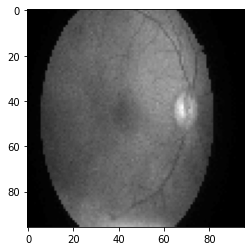

In [11]:
from sklearn.metrics import accuracy_score

prediction = model.predict(xtest)

#print("Accuracy: "+str(accuracy_score(xtest, ytest)))

accuracy = model.score(xtest, ytest)

categories = ["drd" , "no_drd" ]

print(" Accuracy :" , accuracy*100)

print("Prediction is :", categories[prediction[0]])
drd= xtest[0].reshape(96,96)

plt.imshow(drd, cmap='gray')
plt.show()